In [102]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [103]:
from statistics import median
from matplotlib_venn import venn2
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [5]:
def array_remove_none(array):
    return array.values[array.values != np.array(None)]

In [104]:
def normalize_values(dataframe):
    scaler = MinMaxScaler()
    scaler.fit(dataframe)
    return scaler.transform(dataframe)

In [105]:
def cluster_alg(amount, interactions, dataframe):
    cluster = KMeans(n_clusters=amount, max_iter=interactions) #K-MEANS é um algoritmo da família de agrupamento de dados (clustering)
    cluster.fit(dataframe)
    return cluster

In [106]:
def cluster_groups(cluster, dataframe):
    return cluster.predict(dataframe)

In [107]:
def country_groups(groups, countries):
    country = {i: [] for i in range(groups.max() + 1)}
    for i in range(groups.size):
        items = country[groups.item(i)]
        items.append(str(countries.item(i)))
        country[groups.item(i)] = items
    return country

In [154]:
def venn2_intersection(a, b, intersection, a_label, b_label, a_color, b_color):
    plt.clf()
    plt.gca().set_title('Diagrama De Venn')
    venn2(
        subsets= (a, b, len(intersection)), 
        set_labels = (a_label, b_label),
        set_colors= (a_color, b_color),
        alpha= 0.7
    )
    plt.show()

In [109]:
dfCovidEconomyHuman = pd.read_pickle("dataframe/covidEconomyHuman.pkl")

In [110]:
cehDataOver5M = dfCovidEconomyHuman[dfCovidEconomyHuman['Population(2022)'] > 5000000] #eliminar países pequenos em termos de população
cehDataOver5M = cehDataOver5M.reset_index(drop=True)
cehDataOver5M

,Country,HDI Rank(2022),HDI(2022),Population(2022),"GDP(Nominal,2022)",GDP(Per Capita),TotCases1Mpop,Deaths1Mpop,Tests1Mpop
0,Switzerland,1,0.967,8740472,807706000000,92410,507515,1647,2716487
1,Norway,2,0.966,5434319,579267000000,106594,273930,1204,1996315
2,Hong Kong,4,0.956,7488865,359839000000,48050,386217,1958,10011143
3,Denmark,5,0.952,5882261,395404000000,67220,545636,1511,22165247
4,Sweden,5,0.952,10549347,585939000000,55543,269494,2680,1908301
...,...,...,...,...,...,...,...,...,...
106,Burundi,187,0.420,12889576,3073414678,238,4334,3,27386
107,Mali,188,0.410,22593590,18827176532,833,1544,35,37483
108,Chad,189,0.394,17723315,12704149842,717,442,11,10988
109,Niger,189,0.394,26207977,13969605583,533,381,12,9759


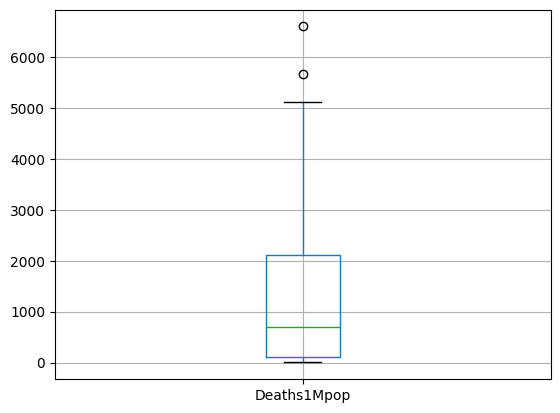

In [111]:
plt.clf()
boxplotDeaths1Mpop = cehDataOver5M.boxplot(column=['Deaths1Mpop']) #Q1(0.25), Q2(0.50), Q3(0.75), outliers
plt.show()

In [112]:
Q1 = cehDataOver5M['Deaths1Mpop'].quantile(0.25)
Q3 = cehDataOver5M['Deaths1Mpop'].quantile(0.75)
IQR = Q3 - Q1

higherBoundary = Q3 + 1.5 * IQR
higherBoundary

5143.25

In [113]:
median = median(cehDataOver5M['Deaths1Mpop'])
median

700

In [114]:
cehDataOver5M[cehDataOver5M['Deaths1Mpop'] >= higherBoundary ] #Outliers

,Country,HDI Rank(2022),HDI(2022),Population(2022),"GDP(Nominal,2022)",GDP(Per Capita),TotCases1Mpop,Deaths1Mpop,Tests1Mpop
42,Bulgaria,70,0.799,6781953,89040398406,13129,195747,5661,1704664
49,Peru,87,0.762,34049588,242632000000,7126,135751,6595,1158115


In [115]:
cehDataLessOutliers = cehDataOver5M[cehDataOver5M['Deaths1Mpop'] <= higherBoundary ]
cehDataLessOutliers = cehDataLessOutliers.reset_index(drop=True)
cehDataLessOutliers

,Country,HDI Rank(2022),HDI(2022),Population(2022),"GDP(Nominal,2022)",GDP(Per Capita),TotCases1Mpop,Deaths1Mpop,Tests1Mpop
0,Switzerland,1,0.967,8740472,807706000000,92410,507515,1647,2716487
1,Norway,2,0.966,5434319,579267000000,106594,273930,1204,1996315
2,Hong Kong,4,0.956,7488865,359839000000,48050,386217,1958,10011143
3,Denmark,5,0.952,5882261,395404000000,67220,545636,1511,22165247
4,Sweden,5,0.952,10549347,585939000000,55543,269494,2680,1908301
...,...,...,...,...,...,...,...,...,...
104,Burundi,187,0.420,12889576,3073414678,238,4334,3,27386
105,Mali,188,0.410,22593590,18827176532,833,1544,35,37483
106,Chad,189,0.394,17723315,12704149842,717,442,11,10988
107,Niger,189,0.394,26207977,13969605583,533,381,12,9759


In [116]:
cehDataLessOutliers[cehDataLessOutliers['Deaths1Mpop'] <= median ] #países que obtiveram bons resultados na pandemia c19

,Country,HDI Rank(2022),HDI(2022),Population(2022),"GDP(Nominal,2022)",GDP(Per Capita),TotCases1Mpop,Deaths1Mpop,Tests1Mpop
7,Singapore,9,0.949,5975689,466789000000,78115,505785,341,4165302
14,United Arab Emirates,17,0.937,9441129,507535000000,53758,105837,233,19910389
16,South Korea,19,0.929,51815810,1665250000000,32138,673523,700,307892
19,Japan,24,0.920,123951692,4231140000000,34135,269169,595,799578
27,Saudi Arabia,40,0.875,36408820,1108150000000,30436,23475,269,1268848
39,Thailand,66,0.803,71697030,495341000000,6909,68056,493,246488
42,China,75,0.788,1425887337,17963200000000,12598,347,4,110461
46,Dominican Republic,82,0.766,11228821,113642000000,10121,61131,397,338350
52,Algeria,93,0.745,44903225,191913000000,4274,5998,152,5093
57,Egypt,105,0.728,110990103,476748000000,4295,4861,232,34792


In [117]:
cehDataLessOutliers.sort_values(by=['Deaths1Mpop'], ascending = False) #países que obtiveram os piores resultados na pandemia c19

,Country,HDI Rank(2022),HDI(2022),Population(2022),"GDP(Nominal,2022)",GDP(Per Capita),TotCases1Mpop,Deaths1Mpop,Tests1Mpop
32,Hungary,47,0.851,9967308,178789000000,17938,232164,5106,1186160
24,Czechia,32,0.895,10493986,290924000000,27723,443246,4053,5386552
30,Slovakia,45,0.855,5643453,115469000000,20461,343872,3887,1364199
25,Greece,33,0.893,10384971,219066000000,21095,591412,3671,9909078
17,United States,20,0.927,338289857,25462700000000,75269,333912,3642,3544901
...,...,...,...,...,...,...,...,...,...
95,Benin,173,0.504,13352864,17401746309,1303,2193,13,47268
107,Niger,189,0.394,26207977,13969605583,533,381,12,9759
106,Chad,189,0.394,17723315,12704149842,717,442,11,10988
42,China,75,0.788,1425887337,17963200000000,12598,347,4,110461


In [119]:
plt.clf()
plotCasesDeathsByCountry = px.scatter(cehDataLessOutliers, x='TotCases1Mpop', y='Deaths1Mpop', color='Country',hover_data=['Country'])
plotCasesDeathsByCountry.show()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

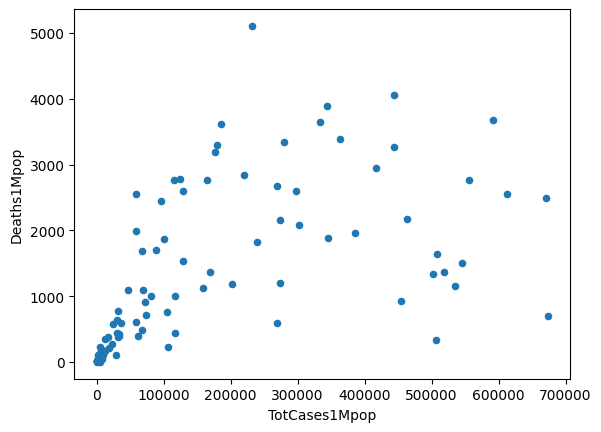

In [120]:
plt.clf()
cehDataLessOutliers.plot.scatter(x='TotCases1Mpop', y='Deaths1Mpop')
plt.show()

In [121]:
countryNames = cehDataLessOutliers['Country']
countryNames = countryNames.values

In [122]:
covidEconomyHuman = cehDataLessOutliers.drop(columns=['Country', 'HDI Rank(2022)', 'Population(2022)', 'GDP(Nominal,2022)'])
covidEconomyHuman.corr()

,HDI(2022),GDP(Per Capita),TotCases1Mpop,Deaths1Mpop,Tests1Mpop
HDI(2022),1.000000,0.751636,0.779691,0.659803,0.484456
GDP(Per Capita),0.751636,1.000000,0.745278,0.387953,0.506723
TotCases1Mpop,0.779691,0.745278,1.000000,0.614357,0.573389
Deaths1Mpop,0.659803,0.387953,0.614357,1.000000,0.316456
Tests1Mpop,0.484456,0.506723,0.573389,0.316456,1.000000


In [123]:
dfEconomyHumanAnalysis = cehDataLessOutliers.drop(columns=['Country', 'HDI Rank(2022)', 'GDP(Nominal,2022)', 'Population(2022)', 'TotCases1Mpop', 'Deaths1Mpop', 'Tests1Mpop'])
dfEconomyHumanAnalysis.corr()

,HDI(2022),GDP(Per Capita)
HDI(2022),1.000000,0.751636
GDP(Per Capita),0.751636,1.000000


In [126]:
norEconomyHuman = normalize_values(dfEconomyHumanAnalysis)
clusterEconomyHuman = cluster_alg(2, 20000, norEconomyHuman)
groupsEconomyHuman = cluster_groups(clusterEconomyHuman, norEconomyHuman)
countryEconomyHuman = country_groups(groupsEconomyHuman, countryNames)
dataEconomyHuman = pd.DataFrame.from_dict(countryEconomyHuman, orient='index')

In [127]:
centroidsEconomyHuman = clusterEconomyHuman.cluster_centers_
dfCentroidsEconomyHuman = pd.DataFrame(centroidsEconomyHuman, columns=['HDI(2022)', 'GDP(Per Capita)'])
dfCentroidsEconomyHuman

,HDI(2022),GDP(Per Capita)
0,0.418446,0.032645
1,0.905987,0.419335


In [128]:
dfCovidAnalysis = cehDataLessOutliers.drop(columns=['Country', 'HDI Rank(2022)', 'HDI(2022)', 'Population(2022)', 'GDP(Per Capita)', 'GDP(Nominal,2022)'])
dfCovidAnalysis.corr()

,TotCases1Mpop,Deaths1Mpop,Tests1Mpop
TotCases1Mpop,1.000000,0.614357,0.573389
Deaths1Mpop,0.614357,1.000000,0.316456
Tests1Mpop,0.573389,0.316456,1.000000


In [129]:
norCovid = normalize_values(dfCovidAnalysis)
clusterCovid = cluster_alg(2, 20000, norCovid)
groupsCovid = cluster_groups(clusterCovid, norCovid)
countryCovid = country_groups(groupsCovid, countryNames)
dataCovid = pd.DataFrame.from_dict(countryCovid, orient='index')

In [130]:
centroidsCovid = clusterCovid.cluster_centers_
dfCentroidsCovid = pd.DataFrame(centroidsCovid, columns=['TotCases1Mpop', 'Deaths1Mpop', 'Tests1Mpop'])
dfCentroidsCovid

,TotCases1Mpop,Deaths1Mpop,Tests1Mpop
0,0.058683,0.094196,0.025677
1,0.548491,0.489638,0.175611


In [131]:
dataGroupsEconomyHuman = dataEconomyHuman.transpose()

In [132]:
dataGroupsCovid = dataCovid.transpose()

In [133]:
developing_socioeconomic_countries = array_remove_none(dataGroupsEconomyHuman[0]) 
developed_socioeconomic_countries = array_remove_none(dataGroupsEconomyHuman[1]) 

In [134]:
countries_with_effective_covid_control_strategies = array_remove_none(dataGroupsCovid[0]) 
countries_facing_challenges_in_covid_mitigation = array_remove_none(dataGroupsCovid[1])

In [141]:
developing = developing_socioeconomic_countries.size
developing_color = '#fbbc05'
developing_label = 'Países Emergentes'

In [142]:
#Países Desenvolvidos
developed = developed_socioeconomic_countries.size
developed_color = '#87aa14'
developed_label = 'Países Desenvolvidos'

In [143]:
#Controle De Crise Eficiente(CCE)
cce = countries_with_effective_covid_control_strategies.size
cce_color = '#d0e6da'
cce_label = 'Controle De Crise Eficiente'

In [144]:
#Gestão De Crise Deficiente(GCD)
gcd = countries_facing_challenges_in_covid_mitigation.size
gcd_color = '#f7c8c9'
gcd_label = 'Gestão De Crise Deficiente'

In [145]:
#PAISES DESENVOLVIDOS

In [146]:
developed_mitigation = set(countries_facing_challenges_in_covid_mitigation).intersection(developed_socioeconomic_countries)
developed_mitigation_result = len(developed_mitigation) / len(developed_socioeconomic_countries) * 100 
developed_mitigation_result

86.11111111111111

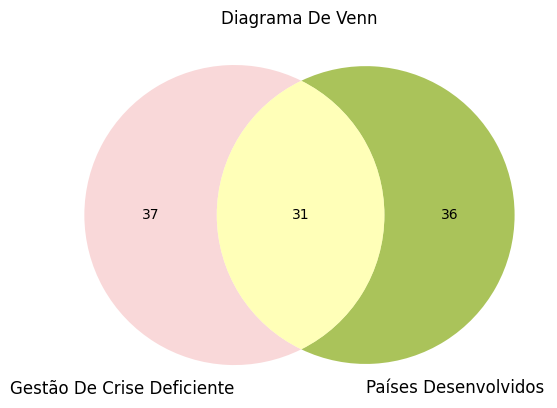

In [155]:
venn2_intersection(gcd, developed, developed_mitigation, gcd_label, developed_label, gcd_color, developed_color)

In [156]:
developed_control_strategies = set(countries_with_effective_covid_control_strategies).intersection(developed_socioeconomic_countries)
developed_control_strategies_result = len(developed_control_strategies) / len(developed_socioeconomic_countries) * 100 
developed_control_strategies_result

13.88888888888889

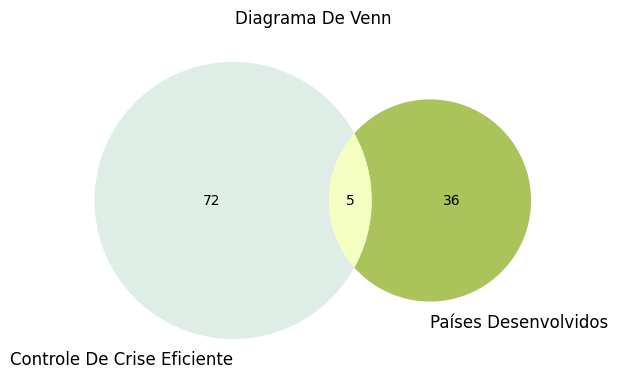

In [157]:
venn2_intersection(cce, developed, developed_control_strategies, cce_label, developed_label, cce_color, developed_color)

In [158]:
#PAISES EM DESENVOLVIMENTO

In [159]:
developing_mitigation = set(countries_facing_challenges_in_covid_mitigation).intersection(developing_socioeconomic_countries)
developing_mitigation_result = len(developing_mitigation) / len(developing_socioeconomic_countries) * 100 
developing_mitigation_result

8.21917808219178

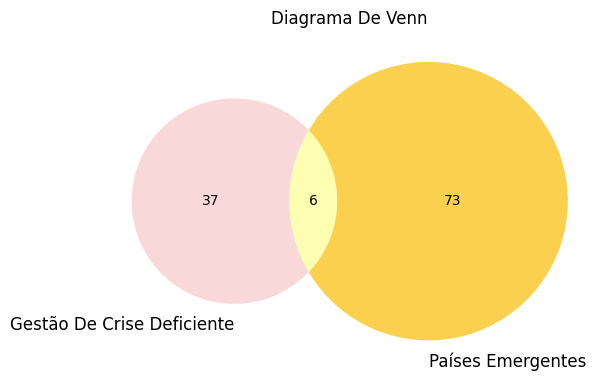

In [160]:
venn2_intersection(gcd, developing, developing_mitigation, gcd_label, developing_label, gcd_color, developing_color)

In [161]:
developing_control_strategies = set(countries_with_effective_covid_control_strategies).intersection(developing_socioeconomic_countries)
developing_control_strategies_result = len(developing_control_strategies) / len(developing_socioeconomic_countries) * 100 
developing_control_strategies_result

91.78082191780823

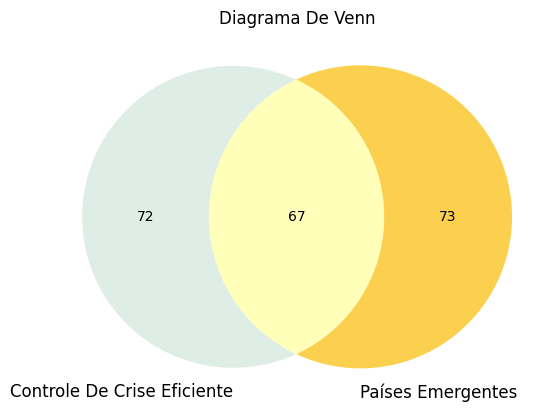

In [163]:
venn2_intersection(cce, developing, developing_control_strategies, cce_label, developing_label, cce_color, developing_color)